In [1]:
# -----------------------------
# Step 1: Import Libraries
# -----------------------------
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import Perceptron
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay
import os
import joblib

In [2]:
# -----------------------------
# Step 2: Load Dataset
# -----------------------------
df = pd.read_csv("placement.csv")

print("Shape of dataset:", df.shape)
print(df.head()) 

Shape of dataset: (100, 4)
   Unnamed: 0  cgpa     iq  placement
0           0   6.8  123.0          1
1           1   5.9  106.0          0
2           2   5.3  121.0          0
3           3   7.4  132.0          1
4           4   5.8  142.0          0


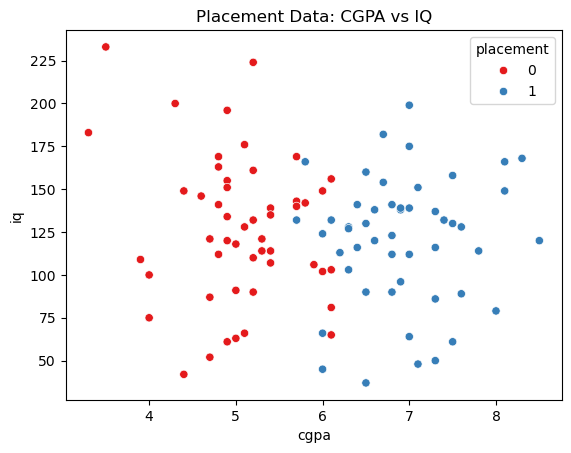

In [3]:
# -----------------------------
# Step 3: Visualization
# -----------------------------
sns.scatterplot(x='cgpa', y='iq', hue='placement', data=df, palette='Set1')
plt.title("Placement Data: CGPA vs IQ")
plt.show()

In [4]:
# -----------------------------
# Step 4: Features and Labels
# -----------------------------
X = df[['cgpa', 'iq']].values
y = df['placement'].values

# Scale features for better training
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [5]:
# -----------------------------
# Step 5: Train Perceptron
# -----------------------------
p = Perceptron(max_iter=1000, tol=1e-3, random_state=42)
p.fit(X, y)

print("Training complete!")
print("Coefficients:", p.coef_)
print("Intercept:", p.intercept_)

Training complete!
Coefficients: [[ 3.33948168 -0.12580523]]
Intercept: [0.]


In [6]:
# -----------------------------
# Step 6: Save Artifacts
# -----------------------------
os.makedirs("model", exist_ok=True)

# Save model and scaler
joblib.dump(p, "model/model.joblib")
joblib.dump(scaler, "model/scaler.joblib")

print("Saved model to model/model.joblib")
print("Saved scaler to model/scaler.joblib")


Saved model to model/model.joblib
Saved scaler to model/scaler.joblib


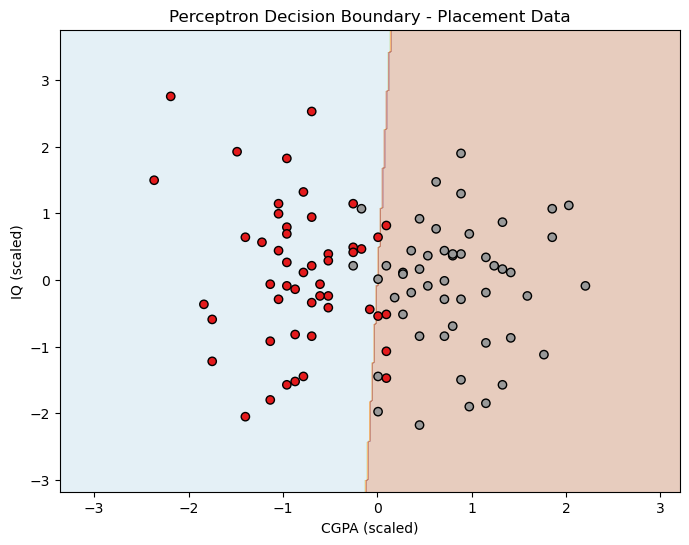

In [7]:
# -----------------------------
# Step 7: Decision Boundary
# -----------------------------
x_min, x_max = X[:,0].min() - 1, X[:,0].max() + 1
y_min, y_max = X[:,1].min() - 1, X[:,1].max() + 1
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 300),
                     np.linspace(y_min, y_max, 300))

Z = p.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.figure(figsize=(8,6))
plt.contourf(xx, yy, Z, alpha=0.3, cmap=plt.cm.Paired)

# ⚠️ Fixed: edgecolor warning by setting marker explicitly
plt.scatter(X[:,0], X[:,1], c=y, edgecolors='k', cmap=plt.cm.Set1, marker='o')

plt.xlabel("CGPA (scaled)")
plt.ylabel("IQ (scaled)")
plt.title("Perceptron Decision Boundary - Placement Data")
plt.show()

In [8]:
# -----------------------------
# Step 8: Accuracy Score
# -----------------------------
y_pred = p.predict(X)
print("Training accuracy:", accuracy_score(y, y_pred))

Training accuracy: 0.93


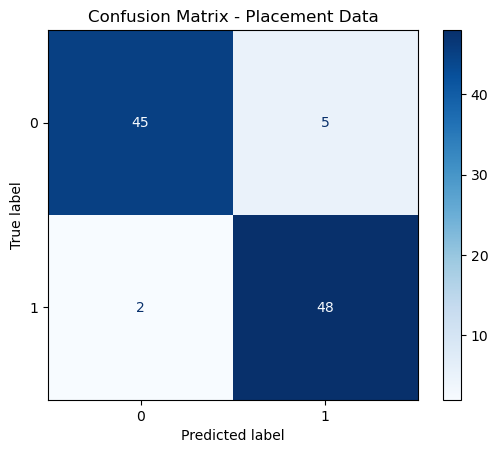

In [9]:
# -----------------------------
# Step 9: Confusion Matrix
# -----------------------------
cm = confusion_matrix(y, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap="Blues")
plt.title("Confusion Matrix - Placement Data")
plt.show()

In [10]:
# -----------------------------
# Step 10: Prediction on New Data
# -----------------------------

# Example new data points: [cgpa, iq]
new_data = np.array([[8.5, 120],
                     [6.0, 100],
                     [7.2, 110]])

# Scale them using the SAME scaler (important!)
new_data_scaled = scaler.transform(new_data)

# Predict using trained perceptron
new_preds = p.predict(new_data_scaled)

# Show results
for i, (inp, pred) in enumerate(zip(new_data, new_preds)):
    print(f"Student {i+1} | CGPA: {inp[0]}, IQ: {inp[1]} --> Placement: {pred}")


Student 1 | CGPA: 8.5, IQ: 120.0 --> Placement: 1
Student 2 | CGPA: 6.0, IQ: 100.0 --> Placement: 1
Student 3 | CGPA: 7.2, IQ: 110.0 --> Placement: 1
